In [ ]:

import keras
import numpy as np


from keras.datasets import mnist
#import pandas as pd
#x=pd.read_csv('anime.csv')
#y=pd.read_csv('rating.csv')



(x_train, y_train), (x_test, y_test) = mnist.load_data()

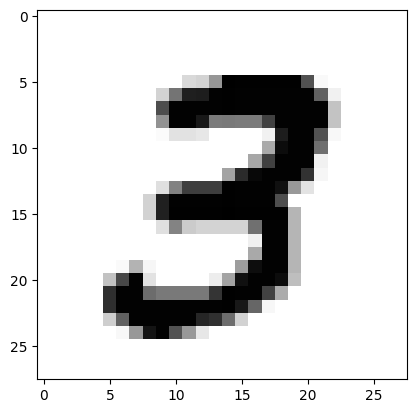

In [ ]:


import matplotlib.pyplot as plt
plt.imshow(x_train[7], cmap=plt.cm.binary)

In [ ]:

print(y_train[7])

3


In [ ]:


print(x_train.ndim)

3


In [ ]:


print(x_train.shape)

(60000, 28, 28)


In [ ]:


print(x_train.dtype)

uint8


In [ ]:


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:

x_train /= 255
x_test /= 255

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
print(x_train.shape)

(60000, 784)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
from keras.utils import to_categorical

In [ ]:
print(y_test[0])

7


In [ ]:
print(y_train[0])

5


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_test.shape)


(10000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 2.1939 - accuracy: 0.1837
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 1.9058 - accuracy: 0.5392
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 1.6902 - accuracy: 0.6254
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 1.5117 - accuracy: 0.6647
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 1.3627 - accuracy: 0.6995
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 1.2374 - accuracy: 0.7305
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 1.1313 - accuracy: 0.7567
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 1.0413 - accuracy: 0.7773
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.9651 - accuracy: 0.7937
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.9003 - accuracy: 0.8060

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8564 - accuracy: 0.8221


In [ ]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.8221


In [ ]:
# Plot confusion matrix
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(predictions[11])

6

In [ ]:
print(predictions[11])

[0.12210703 0.05119962 0.15126437 0.02613158 0.08097793 0.0901231
 0.40003085 0.00880123 0.051388   0.01797636]


In [ ]:
np.sum(predictions[11])

1.0000001